In [134]:
import os
import json
import pickle

import pandas as pd
import numpy as np

import common_metrics
from common_metrics import plot_one_vs_one_roc

from sklearn.metrics import confusion_matrix

In [69]:
project_dir = '/Users/paulp/Library/CloudStorage/OneDrive-UniversityofEasternFinland/UEF/Thesis'
data_dir = os.path.join(project_dir, 'Data')
model_dir = os.path.join(data_dir, 'bayesian_linear_classifier')

# load the custom tokenizer
os.chdir(data_dir)
with open('target_idx.json')as file:
    target_idx = json.loads(file.read())
idx_target = {target_idx[a]:a for a in target_idx.keys()}

os.chdir(data_dir)

with open('token_idx_map.json', 'r') as file:
    token_idx_map = json.load(file)
idx_token_map = {token_idx_map[a]:a for a in token_idx_map.keys()}

with open('frequency_data.npy', 'rb') as f:
    frequency_data = np.load(f)
with open('target_inds.npy', 'rb') as f:
    target_inds = np.load(f)
with open('k.npy', 'rb') as f:
    k = np.load(f)

full_dataset = pd.read_csv('masked_data_set.csv', index_col = 0)
performance_stats = pd.read_csv('performance_stats.csv', header = 0, sep = ',', index_col = 0)
data_comparison = pd.read_csv('model_comparison.csv', index_col = 0)
svm_k3_preds = pd.read_csv('SVM_ks_preds.csv', index_col = 0)
test_labels = pd.read_csv('test_labels.csv', index_col = 0)

In [3]:
performance_stats.loc['BERT', 0:10] = [0.5991758108139038,
 0.579677164554596,
 0.6019929647445679,
 0.57963627576828,
 0.5427031517028809,
 0.5939373970031738,
 0.5974612832069397,
 0.5826840400695801,
 0.5962331891059875,
 0.5251408219337463]
performance_stats['mean'] = performance_stats.iloc[:,0:10].mean(axis =1)
#performance_stats = performance_stats.round(3)

/var/folders/5h/lrwcctsx1xv_r4qlss7b9mt80000gp/T/ipykernel_90996/3635048861.py:1: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  performance_stats.loc['BERT', 0:10] = [0.5991758108139038,


In [218]:
help(pd.explode)

AttributeError: module 'pandas' has no attribute 'explode'

In [217]:
pd.pivot(full_dataset, values='Target', columns = 'Corpus')#.groupby('Target').mean().round(2)

AttributeError: 'DataFrameGroupBy' object has no attribute 'index'

In [18]:
sd = full_dataset[['Target','Length']].groupby('Target').std().round(2)
length_summary['mean'] = full_dataset[['Target','Length']].groupby('Target').mean().round(2)
length_summary['sd'] = sd
length_summary['count'] = full_dataset['Target'].value_counts()
length_summary.drop('Length', axis =1)
tm = full_dataset['Length'].apply(lambda x: )
length_summary.to_csv('length_summary.csv')

In [152]:
performance_stats.to_csv('performance_stats.csv')

In [70]:
data_comparison = pd.concat([data_comparison, svm_k3_preds], axis =1)

In [71]:
c = data_comparison.Label == data_comparison.SVM_pred
data_comparison['SVM_correct'] = c
data_comparison

,BERT_pred,Label,Target,BERT_correct,SVM_pred,SVM_correct
0,1,1,CN,True,1,True
1,0,0,GE,True,0,True
2,2,2,JP,True,2,True
3,3,3,RU,True,3,True
4,1,1,CN,True,1,True
...,...,...,...,...,...,...
1647,5,5,AR,True,5,True
1648,0,4,SP,False,4,True
1649,5,5,AR,True,5,True
1650,5,5,AR,True,1,False


In [66]:
data_comparison.BERT_correct.sum()/len(data_comparison)

0.6053268765133172

In [72]:
pd.DataFrame(full_dataset.query('k == 3'))

,Corpus,Target,Text,Length,k
12,ICLE,CN,"In the Past ten years, the development of info...",514,3
17,ICLE,GE,Television commercial always interrupts a film...,486,3
49,ICLE,JP,I don't think all of the <MISC> students must ...,666,3
58,ICLE,RU,The question of dreaming and imagination alway...,1009,3
71,ICLE,CN,1. \n\n Before specially talking about tourism...,640,3
...,...,...,...,...,...
16492,TOEFL11,AR,students now all over the world are receving t...,251,3
16497,TOEFL11,SP,"Throughout history, humans have competed and s...",517,3
16508,TOEFL11,AR,All peaple in this world injoy their life in t...,375,3
16512,TOEFL11,AR,"Most of young peoples nowadays, for some reaso...",383,3


In [98]:
data_comparison['Corpus'] = full_dataset.query('k == 3')['Corpus'].reset_index(drop = True)
data_comparison['Length'] = full_dataset.query('k == 3')['Length'].reset_index(drop = True)

In [75]:
full_dataset.query('k == 3')['Corpus'].value_counts()

EFCAM      954
TOEFL11    489
ICLE       151
PELIC       58
Name: Corpus, dtype: int64

In [99]:
data_comparison['clipped_length'] = data_comparison['Length']

,BERT_pred,Label,Target,BERT_correct,SVM_pred,SVM_correct,Corpus,Length
0,1,1,CN,True,1,True,ICLE,514
1,0,0,GE,True,0,True,ICLE,486
2,2,2,JP,True,2,True,ICLE,666
3,3,3,RU,True,3,True,ICLE,1009
4,1,1,CN,True,1,True,ICLE,640
...,...,...,...,...,...,...,...,...
1647,5,5,AR,True,5,True,TOEFL11,251
1648,0,4,SP,False,4,True,TOEFL11,517
1649,5,5,AR,True,5,True,TOEFL11,375
1650,5,5,AR,True,1,False,TOEFL11,383


In [77]:
corpus_comparison = pd.DataFrame(data_comparison[['Corpus', 'SVM_correct', 'BERT_correct']].value_counts()).sort_values(by='SVM_correct').sort_values(by='Corpus')
corpus_comparison['Count'] = corpus_comparison[0]
corpus_comparison.drop(0, axis = 1, inplace = True)

In [130]:
def threshold(x):
    if x >= 512:
        y = 512
    else:
        y = x
    return y

data_comparison['clipped_length'] = data_comparison['Length'].apply(lambda x: threshold(x))

In [131]:
corpus_comparison = (data_comparison
                        .groupby(['Corpus', 'SVM_correct', 'BERT_correct'])
                        .clipped_length.mean().round(2).to_frame()
                    )

corpus_comparison['SD'] = (data_comparison
                        .groupby(['Corpus', 'SVM_correct', 'BERT_correct'])
                        .clipped_length
                        .std()
                        .round(2)
                          )
                                                                                    
corpus_comparison['Count'] = (data_comparison
                        .groupby(['Corpus', 'SVM_correct', 'BERT_correct'])['Corpus', 'SVM_correct', 'BERT_correct']
                        .value_counts()
                              )

corpus_comparison['%'] = (corpus_comparison
                        .groupby(level=0)['Count']
                        #.Count#.percent()
                        .transform(lambda x: np.round(x/x.sum(), 2))
                         )

corpus_comparison.to_csv('corpus_comparison.csv')
corpus_comparison

/var/folders/5h/lrwcctsx1xv_r4qlss7b9mt80000gp/T/ipykernel_90996/3250823098.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corpus_comparison['Count'] = (data_comparison


clipped_length      SD  Count     %
Corpus  SVM_correct BERT_correct                                     
EFCAM   False       False                 209.35   50.61    277  0.29
                    True                  202.91   48.36    158  0.17
        True        False                 203.94   40.92    157  0.16
                    True                  203.21   38.75    362  0.38
ICLE    False       False                 490.75   42.50      4  0.03
                    True                  505.64   16.78     14  0.09
        True        False                 468.43   93.34     14  0.09
                    True                  491.70   59.29    119  0.79
PELIC   False       False                 348.14  120.19     21  0.36
                    True                  339.11   87.98      9  0.16
        True        False                 356.85  103.70     13  0.22
                    True                  377.13  111.51     15  0.26
TOEFL11 False       False                 378.90   71.64     87  0.18
                    True                  369.66   71.68     61  0.12
        True        False                 384.15   70.81     79  0.16
                    True                  379.25   62.53    262  0.54

In [132]:
L1_comparison = (data_comparison
                        .groupby(['Target', 'SVM_correct', 'BERT_correct'])
                        .clipped_length.mean().round(2).to_frame()
                    )

L1_comparison['SD'] = (data_comparison
                        .groupby(['Target', 'SVM_correct', 'BERT_correct'])
                        .clipped_length
                        .std()
                        .round(2)
                          )
                                                                                    
L1_comparison['Count'] = (data_comparison
                        .groupby(['Target', 'SVM_correct', 'BERT_correct'])['Target', 'SVM_correct', 'BERT_correct']
                        .value_counts()
                              )

L1_comparison['%'] = (L1_comparison
                        .groupby(level=0)['Count']
                        #.Count#.percent()
                        .transform(lambda x: np.round(x/x.sum(), 2))
                         )

L1_comparison.to_csv('L1_comparison.csv')
L1_comparison

/var/folders/5h/lrwcctsx1xv_r4qlss7b9mt80000gp/T/ipykernel_90996/1090912994.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  L1_comparison['Count'] = (data_comparison


clipped_length      SD  Count     %
Target SVM_correct BERT_correct                                     
AR     False       False                 276.40  111.19     70  0.37
                   True                  324.97  101.73     29  0.15
       True        False                 312.26  116.56     43  0.23
                   True                  329.33   98.40     46  0.24
CN     False       False                 273.81  109.80     79  0.29
                   True                  373.69  117.71     16  0.06
       True        False                 287.30   91.22     54  0.20
                   True                  427.77  102.14    123  0.45
GE     False       False                 243.65   94.13     65  0.13
                   True                  240.81   81.61     68  0.14
       True        False                 250.72  112.31     39  0.08
                   True                  264.71  102.94    314  0.65
JP     False       False                 237.92   77.80     50  0.26
                   True                  366.43  109.29     21  0.11
       True        False                 305.38  125.03     32  0.17
                   True                  386.80   98.16     87  0.46
RU     False       False                 226.95   69.40     57  0.28
                   True                  207.82   91.85     44  0.22
       True        False                 219.86   73.42     43  0.21
                   True                  244.76  121.74     58  0.29
SP     False       False                 273.25  100.91     68  0.22
                   True                  251.92   99.92     64  0.20
       True        False                 300.37  121.50     52  0.17
                   True                  295.08  114.04    130  0.41

In [179]:
data_comparison[]

,BERT_pred,Label,Target,BERT_correct,SVM_pred,SVM_correct,Corpus,Length,clipped_length
0,1,1,CN,True,1,True,ICLE,514,512
1,0,0,GE,True,0,True,ICLE,486,486
2,2,2,JP,True,2,True,ICLE,666,512
3,3,3,RU,True,3,True,ICLE,1009,512
4,1,1,CN,True,1,True,ICLE,640,512
...,...,...,...,...,...,...,...,...,...
1647,5,5,AR,True,5,True,TOEFL11,251,251
1648,0,4,SP,False,4,True,TOEFL11,517,512
1649,5,5,AR,True,5,True,TOEFL11,375,375
1650,5,5,AR,True,1,False,TOEFL11,383,383


In [146]:
[idx_target[a] for a in idx_target.keys()]

['GE', 'CN', 'JP', 'RU', 'SP', 'AR']

In [168]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

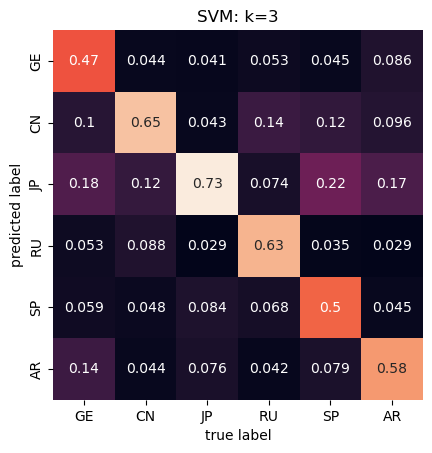

In [177]:
%matplotlib inline
svm_cm = confusion_matrix(data_comparison['Target'].to_numpy(), 
                           [idx_target[a] for a in data_comparison['SVM_pred'].to_numpy()], 
                          normalize = 'true')

p = sns.heatmap(svm_cm.T, 
                square=True, 
                annot=True, 
                cbar=False,
            xticklabels=target_idx.keys(), 
                yticklabels=target_idx.keys())
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('SVM: k=3')
plt.savefig("SVM_k3_confusion_matrix.png",
          dpi='figure', 
          format='png', 
          #metadata=None,
    bbox_inches=None, pad_inches=0.1,
    facecolor='auto', edgecolor='auto',
    backend=None
   )

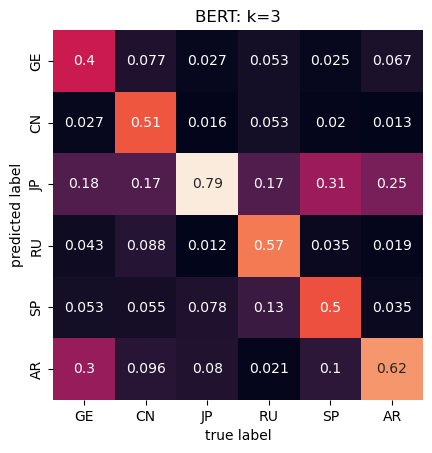

In [178]:
svm_cm = confusion_matrix(data_comparison['Target'].to_numpy(), 
                           [idx_target[a] for a in data_comparison['BERT_pred'].to_numpy()], 
                          normalize = 'true')

p = sns.heatmap(svm_cm.T, 
                square=True, 
                annot=True, 
                cbar=False,
            xticklabels=target_idx.keys(), 
                yticklabels=target_idx.keys())
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('BERT: k=3')
plt.savefig("BERT_k3_confusion_matrix.png",
          dpi='figure', 
          format='png', 
          #metadata=None,
    bbox_inches=None, pad_inches=0.1,
    facecolor='auto', edgecolor='auto',
    backend=None
   )

In [194]:
os.chdir(project_dir + '/Models')
with open('train_stats_R2_k3.pkl', 'rb') as f:
    bert_stats_2 = pickle.load(f)
with open('train_stats_k3.pkl', 'rb') as f:
    bert_stats_1 = pickle.load(f)

In [195]:
val_loss = []
train_loss = []
for epoch in bert_stats_1:
    val_loss.append(np.round(epoch['val_stats']['avg_val_loss'], 5))
    train_loss.append(np.round(epoch['train_stats']['avg_train_loss'], 5))
for epoch in bert_stats_2:
    val_loss.append(np.round(epoch['val_stats']['avg_val_loss'], 5))
    train_loss.append(np.round(epoch['train_stats']['avg_train_loss'], 5))

In [204]:
val_loss

[1.76988,
 1.68723,
 1.63005,
 1.59572,
 1.53501,
 1.44562,
 1.45912,
 1.43752,
 1.34852,
 1.34248,
 1.29816,
 1.25787,
 1.24914,
 1.21842,
 1.22323,
 1.23678,
 1.26183,
 1.16327,
 1.24828,
 1.18058,
 0.81058,
 0.82761,
 0.83507,
 0.81288,
 0.82975,
 0.82239,
 0.83472,
 0.83775,
 0.82863,
 0.82391]

In [201]:
np.sequence(len(train_loss))

AttributeError: module 'numpy' has no attribute 'sequence'

In [483]:
corpus_comparison.groupby(level=0).apply(lambda x: x)#100 * x / float(x.sum()))


Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


0  Count      %
Corpus  SVM_correct BERT_correct                   
EFCAM   False       False         277    277  277.0
                    True          158    158  158.0
        True        True          362    362  362.0
                    False         157    157  157.0
ICLE    False       True           14     14   14.0
                    False           4      4    4.0
        True        True          119    119  119.0
                    False          14     14   14.0
PELIC   False       False          21     21   21.0
                    True            9      9    9.0
        True        True           15     15   15.0
                    False          13     13   13.0
TOEFL11 False       False          87     87   87.0
                    True           61     61   61.0
        True        True          262    262  262.0
                    False          79     79   79.0

In [487]:
corpus_comparison.groupby('Corpus').sum()

,0,Count,%
Corpus,,,
EFCAM,954,954,954.0
ICLE,151,151,151.0
PELIC,58,58,58.0
TOEFL11,489,489,489.0


In [467]:
corpus_comparison['%'] = corpus_comparison['Count'] / corpus_comparison.index.value_counts()

In [468]:
corpus_comparison

0  Count      %
Corpus  SVM_correct BERT_correct                   
EFCAM   False       False         277    277  277.0
                    True          158    158  158.0
        True        True          362    362  362.0
                    False         157    157  157.0
ICLE    False       True           14     14   14.0
                    False           4      4    4.0
        True        True          119    119  119.0
                    False          14     14   14.0
PELIC   False       False          21     21   21.0
                    True            9      9    9.0
        True        True           15     15   15.0
                    False          13     13   13.0
TOEFL11 False       False          87     87   87.0
                    True           61     61   61.0
        True        True          262    262  262.0
                    False          79     79   79.0

In [ ]:
data_comparison

In [588]:
np.round(data_comparison.loc[:, ['SVM_correct', 'BERT_correct']].value_counts()/len(data_comparison), 2)

SVM_correct  BERT_correct
True         True            0.46
False        False           0.24
True         False           0.16
False        True            0.15
dtype: float64

In [398]:
data_comparison.loc[:, ['Corpus','SVM_correct', 'BERT_correct']].value_counts()

Corpus  SVM_correct  BERT_correct
ICLE    True         True            59
        False        False           35
        True         False           22
        False        True            21
dtype: int64

In [592]:
data_comparison['Length'] = full_dataset.query('k == 3')['Length'].reset_index(drop=True)
data_comparison

,BERT_pred,Label,Target,BERT_correct,SVM_pred,SVM_correct,Corpus,Length
0,1,1,CN,True,1,True,ICLE,514
1,0,0,GE,True,0,True,ICLE,486
2,2,2,JP,True,2,True,ICLE,666
3,3,3,RU,True,3,True,ICLE,1009
4,1,1,CN,True,1,True,ICLE,640
5,3,3,RU,True,3,True,ICLE,1871
6,0,0,GE,True,0,True,ICLE,280
7,0,4,SP,False,4,True,ICLE,621
8,1,1,CN,True,1,True,ICLE,435
9,0,0,GE,True,0,True,ICLE,1010


In [602]:
help(data_comparison.groupby(['SVM_correct', 'BERT_correct'])['Length'].hist)

Help on function hist in module pandas.core.groupby.groupby:

hist(*args, **kwargs)



In [625]:
def threshold(x):
    if x >= 512:
        y = 512
    else:
        y = x
    return y

data_comparison['clipped_length'] = data_comparison['Length'].apply(lambda x: threshold(x))

In [636]:
data_comparison

,BERT_pred,Label,Target,BERT_correct,SVM_pred,SVM_correct,Corpus,Length,clipped_length
0,1,1,CN,True,1,True,ICLE,514,512
1,0,0,GE,True,0,True,ICLE,486,486
2,2,2,JP,True,2,True,ICLE,666,512
3,3,3,RU,True,3,True,ICLE,1009,512
4,1,1,CN,True,1,True,ICLE,640,512
5,3,3,RU,True,3,True,ICLE,1871,512
6,0,0,GE,True,0,True,ICLE,280,280
7,0,4,SP,False,4,True,ICLE,621,512
8,1,1,CN,True,1,True,ICLE,435,435
9,0,0,GE,True,0,True,ICLE,1010,512


In [635]:
length_comparison = pd.DataFrame(data_comparison.groupby(['BERT_correct', 'SVM_correct'])['clipped_length'].mean().round(2))
length_comparison['mean'] = length_comparison['clipped_length']
#length_comparison.drop('clipped_length', axis = 1, inplace = True)
length_comparison['sd'] = data_comparison.groupby(['BERT_correct','SVM_correct'])['clipped_length'].std().round(2)
length_comparison.drop('clipped_length', axis = 1, inplace = True)
length_comparison#.to_csv('length_comparison.csv')

mean      sd
BERT_correct SVM_correct                
False        False        257.66   98.40
             True         279.71  111.09
True         False        267.52  109.26
             True         312.79  123.40

In [637]:
data_comparison.groupby(['Target','BERT_correct','SVM_correct'])['clipped_length'].mean().round(2)#.hist(bins = 50, alpha=0.5, legend = True)#.var()

Target  BERT_correct  SVM_correct
AR      False         False          276.40
                      True           312.26
        True          False          324.97
                      True           329.33
CN      False         False          273.81
                      True           287.30
        True          False          373.69
                      True           427.77
GE      False         False          243.65
                      True           250.72
        True          False          240.81
                      True           264.71
JP      False         False          237.92
                      True           305.38
        True          False          366.43
                      True           386.80
RU      False         False          226.95
                      True           219.86
        True          False          207.82
                      True           244.76
SP      False         False          273.25
                      True           300.3

In [ ]:
full_dataset.groupby('Corpus').value_counts()

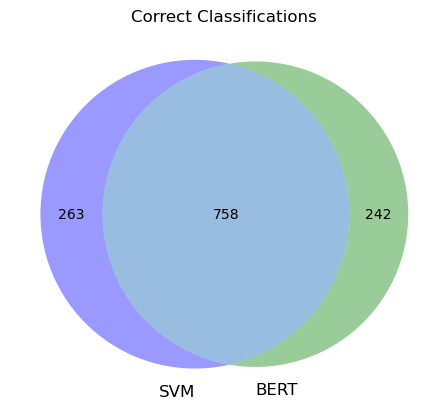

In [172]:
sets = data_comparison.loc[:, ['SVM_correct', 'BERT_correct']].value_counts()
venn2(subsets=(sets[2], # SVM-T, BERT-F
               sets[3], # F, T
               sets[0],), # T, T
      set_colors=('blue', 'green'),
      set_labels=('SVM', 'BERT'))
plt.title('Correct Classifications')
plt.savefig('correct_classifications_venn.png', dpi='figure', format='png')

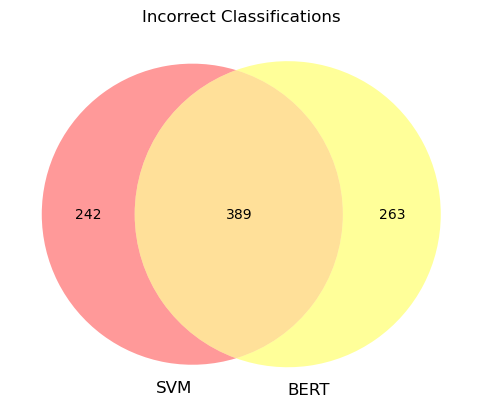

In [173]:
sets = data_comparison.loc[:, ['SVM_correct', 'BERT_correct']].value_counts()
venn2(subsets=(sets[3], # SVM-F, BERT-T
               sets[2], # T, F
               sets[1],), # F, F
      set_colors=('red', 'yellow'),
      set_labels=('SVM', 'BERT'))
plt.title('Incorrect Classifications')
plt.savefig('incorrect_classifications_venn.png', dpi='figure', format='png')

In [191]:
n_classes = len(target_idx.keys())

In [31]:
data_comparison

,BERT_pred,Label,Target,BERT_correct
0,1,1,CN,True
1,0,0,GE,True
2,2,2,JP,True
3,3,3,RU,True
4,1,1,CN,True
...,...,...,...,...
1647,5,5,AR,True
1648,0,4,SP,False
1649,5,5,AR,True
1650,5,5,AR,True


In [213]:
import importlib
importlib.reload(common)

<module 'common' from '/Users/paulp/Library/CloudStorage/OneDrive-UniversityofEasternFinland/UEF/Thesis/Notebooks/common.py'>

In [25]:
# BERT libraries

import os
import json
import pandas as pd
import importlib
import pickle
import numpy as np

import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import (TensorDataset, 
                              DataLoader, 
                              RandomSampler, 
                              SequentialSampler)
from torchmetrics import F1Score

from transformers import (AutoModel,
                          AutoConfig,
                          BertModel,
                          BertTokenizer,
                          BertForSequenceClassification,
                          get_linear_schedule_with_warmup)

import common
from common import (ClassificationDataset, 
                    BERT_fine_tune_validation, 
                    BERT_fine_tune_train, 
                    plot_confusion_matrix,
                   train_test_val_split, 
                   get_weights,
                   CustomModel)

In [32]:

import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from transformers import BertTokenizer, BertForQuestionAnswering, BertConfig

from captum.attr import visualization as viz
from captum.attr import IntegratedGradients, LayerConductance, LayerIntegratedGradients, LayerActivation
from captum.attr import configure_interpretable_embedding_layer, remove_interpretable_embedding_layer


In [41]:
weights = get_weights(full_dataset, target_idx, n_classes = n_classes)
weighted_cross_entropy_loss = torch.nn.CrossEntropyLoss(weight=weights)

# load tokenizer
os.chdir(project_dir + '/Models')
bert_tokenizer = BertTokenizer.from_pretrained('custom_bert_tokenizer')

# load model
n_classes = 6
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
bert_custom_model = CustomModel(num_labels = n_classes, 
                    loss_fn = weighted_cross_entropy_loss, 
                    tokenizer = bert_tokenizer, 
                    dropout = 0.03)
#bert_custom_model.to(device)

checkpoint = torch.load(f'BERT_cyclic_R2_k3.pt', map_location = device)
bert_custom_model.load_state_dict(checkpoint['model_state_dict'])

#model = BertForQuestionAnswering.from_pretrained(model_path, output_attentions=True)
bert_custom_model.to(device)
bert_custom_model.eval()
bert_custom_model.zero_grad()



GE    0.911224
SP    0.941159
CN    0.956156
RU    1.039283
JP    1.065081
AR    1.087097
Name: Target, dtype: float64


In [43]:
# get test set
test_ds = ClassificationDataset(full_dataset.query(f"k == 3"),
                                  bert_tokenizer,
                                  target_idx,
                                  max_seq_len = 512)

test_dataloader = DataLoader(
                          test_ds,
                          shuffle = False,
                          #sampler = RandomSampler(test_ds),
                          batch_size = 8)



In [48]:
metric = F1Score(num_classes=n_classes, average = 'macro')

In [49]:
stats = BERT_fine_tune_validation(bert_custom_model, test_dataloader, device, metric = metric)


Running Validation...
  Accuracy: 0.61
  Validation Loss: 1.08
  Validation F1 Score: 0.580
  Validation took: 0:07:10


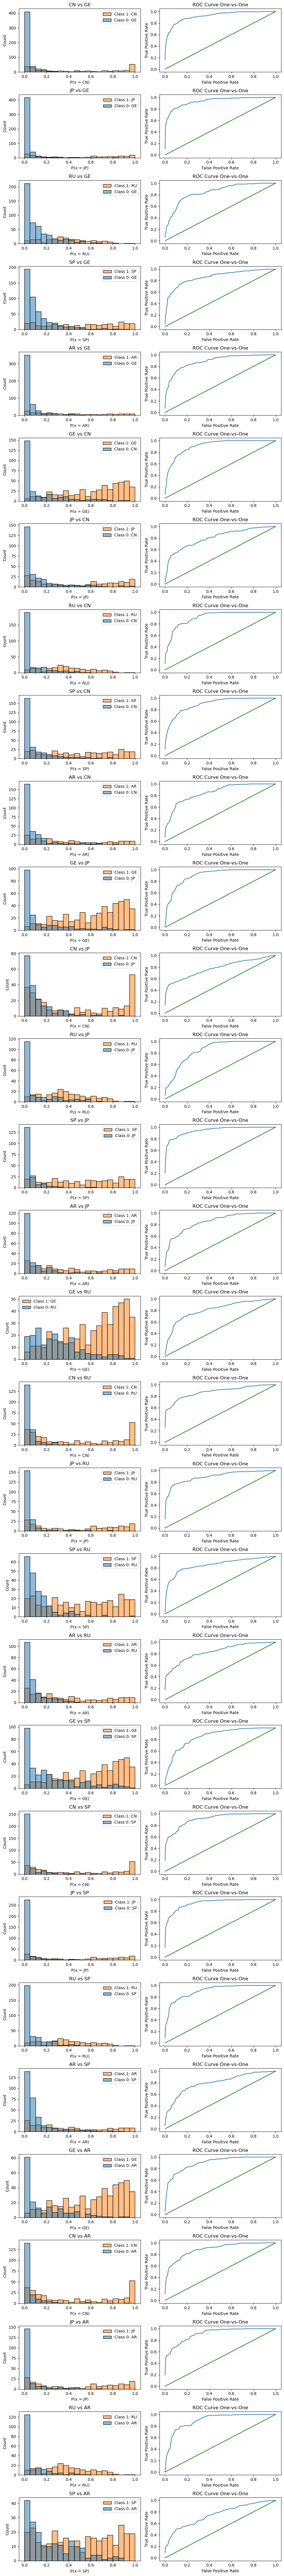

In [54]:
plot_one_vs_one_roc(stats[1]['y_true'], stats[1]['logits'], idx_target)

In [53]:
stats

(tensor(1.0794),
 {'avg_val_loss': 1.0793957710266113,
  'val_time': '0:07:10',
  'val_f1': tensor(0.5796),
  'avg_flat_acc': 0.6056763285024155,
  'logits': tensor([[-2.9875,  7.4378,  3.4776, -2.9363, -3.6863, -1.3312],
          [ 4.8527, -2.8044, -3.7755,  0.8328,  1.7613,  0.0478],
          [ 0.2455, -0.1269,  5.3038,  0.3116, -1.1228, -3.3325],
          ...,
          [-1.6292,  1.4270, -0.8575, -3.1931, -2.0782,  6.0564],
          [-1.4113,  0.3886, -2.4366, -3.7093,  2.1271,  5.2246],
          [-2.4929,  4.4981,  1.9294, -6.0035, -0.7687,  0.3425]]),
  'y_pred': tensor([1, 0, 2,  ..., 5, 5, 1], dtype=torch.int32),
  'y_true': tensor([1, 0, 2,  ..., 5, 5, 1], dtype=torch.int32)})

In [307]:
sample[1][0].unsqueeze(0)

tensor([1])

In [311]:
bert_custom_model.model.embeddings

BertEmbeddings(
  (word_embeddings): Embedding(22500, 768)
  (position_embeddings): Embedding(512, 768)
  (token_type_embeddings): Embedding(2, 768)
  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [22]:
for a in test_dataloader:
    input_ids = a[0]['input_ids']

NameError: name 'preds' is not defined

In [21]:
help(plot_one_vs_one_roc)

Help on function plot_one_vs_one_roc in module common_metrics:

plot_one_vs_one_roc(y_true, logits, idx_target)
    Plots the Probability Distributions and the ROC Curves One vs One
    y_true is a tensor object n_samples long.
    logits are n_samples * n_classes, not yet softmaxed



In [23]:
sample

NameError: name 'sample' is not defined

In [315]:
input_ids = sample[0]['input_ids'][0]
token_type_ids = sample[0]['token_type_ids'][0]
attention_mask = sample[0]['attention_mask'][0]
label = sample[1][0].unsqueeze(0)

In [365]:
bert_custom_model(input_ids, token_type_ids, attention_mask, label)['logits'].flatten()

tensor([-2.9019,  6.1066,  0.3749, -3.9536, -2.0587,  2.3466],
       grad_fn=<ReshapeAliasBackward0>)

In [335]:
refs = torch.zeros(torch.sum(attention_mask != 0, axis =1))
refs[0]  = cls_token_id
refs


tensor([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [366]:
def modified_forward_func(input_ids, 
                          token_type_ids=None, 
                          #position_ids=None, 
                          attention_mask=None, 
                          labels = None
                         ):
    pred = bert_custom_model(input_ids, 
                             token_type_ids=token_type_ids,
                # position_ids=position_ids, 
                             attention_mask=attention_mask, 
                            labels = labels)
    pred = pred['logits']#[int(labels.item())]
    return pred[int(labels.item())]#.values

ref_token_id = bert_tokenizer.pad_token_id # A token used for generating token reference
sep_token_id = bert_tokenizer.sep_token_id # A token used as a separator
cls_token_id = bert_tokenizer.cls_token_id

In [356]:
modified_forward_func(input_ids, token_type_ids, attention_mask, label)

<function Tensor.values>

In [367]:
#lig = LayerIntegratedGradients(bert_custom_model(input_ids, 
#                                                 token_type_ids, 
#                                                 attention_mask, 
#                                                 label), 
#                               bert_custom_model.model.embeddings)

lig = LayerIntegratedGradients(modified_forward_func, 
                               bert_custom_model.model.embeddings)

attributions_start, delta_start = lig.attribute(inputs=input_ids,
                                  baselines= 0, #refs, # how do you get this?
                                target = label,
                                  additional_forward_args=(token_type_ids, 
                                                           #position_ids, 
                                                           attention_mask, 
                                                           ),
                                  return_convergence_delta=True)

attributions_end, delta_end = lig.attribute(inputs=input_ids, baselines= 0,#refs,#ref_input_ids,
                                target = label,
                                            additional_forward_args=(token_type_ids, 
                                                         #position_ids, 
                                                         attention_mask, 
                                                         ),
                                return_convergence_delta=True)


In [372]:

attributions_start_sum = summarize_attributions(attributions_start)
attributions_end_sum = summarize_attributions(attributions_end)

In [374]:
pred = bert_custom_model(input_ids, 
                             token_type_ids=token_type_ids,
                # position_ids=position_ids, 
                             attention_mask=attention_mask, 
                            labels = label)['logits']

In [ ]:
# storing couple samples in an array for visualization purposes
start_position_vis = viz.VisualizationDataRecord(
                        attributions_start_sum,
                        torch.max(torch.softmax(start_scores[0], dim=0)),
                        torch.argmax(start_scores),
                        torch.argmax(start_scores),
                        str(ground_truth_start_ind),
                        attributions_start_sum.sum(),       
                        all_tokens,
                        delta_start)

end_position_vis = viz.VisualizationDataRecord(
                        attributions_end_sum,
                        torch.max(torch.softmax(end_scores[0], dim=0)),
                        torch.argmax(end_scores),
                        torch.argmax(end_scores),
                        str(ground_truth_end_ind),
                        attributions_end_sum.sum(),       
                        all_tokens,
                        delta_end)

print('\033[1m', 'Visualizations For Start Position', '\033[0m')
viz.visualize_text([start_position_vis])

print('\033[1m', 'Visualizations For End Position', '\033[0m')
viz.visualize_text([end_position_vis])

In [325]:
bert_tokenizer.encode(test_ds[0])

OrderedDict([('[PAD]', 0),
             ('[UNK]', 1),
             ('[CLS]', 2),
             ('[SEP]', 3),
             ('[MASK]', 4),
             ('<?>', 5),
             ('<*>', 6),
             ('<R>', 7),
             ('<MISC>', 8),
             ('<ORG>', 9),
             ('<LOC>', 10),
             ('<PER>', 11),
             ('!', 12),
             ('"', 13),
             ('#', 14),
             ('$', 15),
             ('%', 16),
             ('&', 17),
             ("'", 18),
             ('(', 19),
             (')', 20),
             ('*', 21),
             ('+', 22),
             (',', 23),
             ('-', 24),
             ('.', 25),
             ('/', 26),
             ('0', 27),
             ('1', 28),
             ('2', 29),
             ('3', 30),
             ('4', 31),
             ('5', 32),
             ('6', 33),
             ('7', 34),
             ('8', 35),
             ('9', 36),
             (':', 37),
             (';', 38),
             ('<', 39),
      

In [347]:
# helper functions

def predict(inputs, token_type_ids=None, position_ids=None, attention_mask=None):
    output = bert_custom_model(inputs, 
                               token_type_ids=token_type_ids,
                # position_ids=position_ids, 
                               attention_mask=attention_mask, )
    return output.start_logits, output.end_logits



def construct_input_ref_pair(question, 
                             #text, 
                             ref_token_id, 
                             #sep_token_id, 
                             cls_token_id):
    question_ids = bert_tokenizer.encode(question, add_special_tokens=False)
    text_ids = bert_tokenizer.encode(text, add_special_tokens=False)

    # construct input token ids
    #input_ids = [cls_token_id] + question_ids + [sep_token_id] + text_ids + [sep_token_id]

    # construct reference token ids 
    ref_input_ids = [cls_token_id] + [ref_token_id] * len(question_ids) + [sep_token_id] + \
        [ref_token_id] * len(text_ids) + [sep_token_id]

    return torch.tensor([input_ids], device=device), torch.tensor([ref_input_ids], device=device), len(question_ids)

def construct_input_ref_token_type_pair(input_ids, sep_ind=0):
    seq_len = input_ids.size(1)
    token_type_ids = torch.tensor([[0 if i <= sep_ind else 1 for i in range(seq_len)]], device=device)
    ref_token_type_ids = torch.zeros_like(token_type_ids, device=device)# * -1
    return token_type_ids, ref_token_type_ids

def construct_input_ref_pos_id_pair(input_ids):
    seq_length = input_ids.size(1)
    position_ids = torch.arange(seq_length, dtype=torch.long, device=device)
    # we could potentially also use random permutation with `torch.randperm(seq_length, device=device)`
    ref_position_ids = torch.zeros(seq_length, dtype=torch.long, device=device)

    position_ids = position_ids.unsqueeze(0).expand_as(input_ids)
    ref_position_ids = ref_position_ids.unsqueeze(0).expand_as(input_ids)
    
    return position_ids, ref_position_ids
    
def construct_attention_mask(input_ids):
    return torch.ones_like(input_ids)
    
def construct_whole_bert_embeddings(input_ids, ref_input_ids, \
                                    token_type_ids=None, ref_token_type_ids=None, \
                                    position_ids=None, ref_position_ids=None):
    input_embeddings = interpretable_embedding.indices_to_embeddings(input_ids)
    ref_input_embeddings = interpretable_embedding.indices_to_embeddings(ref_input_ids)
    
    return input_embeddings, ref_input_embeddings

def summarize_attributions(attributions):
    attributions = attributions.sum(dim=-1).squeeze(0)
    attributions = attributions / torch.norm(attributions)
    return attributions

In [277]:
input_ids, ref_input_ids, sep_id = construct_input_ref_pair(question, text, ref_token_id, sep_token_id, cls_token_id)
token_type_ids, ref_token_type_ids = construct_input_ref_token_type_pair(input_ids, sep_id)
position_ids, ref_position_ids = construct_input_ref_pos_id_pair(input_ids)
attention_mask = construct_attention_mask(input_ids)

indices = input_ids[0].detach().tolist()
all_tokens = tokenizer.convert_ids_to_tokens(indices)

attributions_start_sum = summarize_attributions(attributions_start)
attributions_end_sum = summarize_attributions(attributions_end)

NameError: name 'question' is not defined

In [375]:
help(viz.VisualizationDataRecord)

Help on class VisualizationDataRecord in module captum.attr._utils.visualization:

class VisualizationDataRecord(builtins.object)
 |  VisualizationDataRecord(word_attributions, pred_prob, pred_class, true_class, attr_class, attr_score, raw_input_ids, convergence_score) -> None
 |  
 |  A data record for storing attribution relevant information
 |  
 |  Methods defined here:
 |  
 |  __init__(self, word_attributions, pred_prob, pred_class, true_class, attr_class, attr_score, raw_input_ids, convergence_score) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  attr_class
 |  
 |  attr_score
 |  
 |  convergence_score
 |  
 |  pred_class
 |  
 |  pred_prob
 |  
 |  raw_input_ids
 |  
 |  true_class
 |  
 |  word_attributions



In [380]:
input_ids.shape

torch.Size([1, 512])

In [381]:
bert_tokenizer.convert_ids_to_tokens(input_ids.flatten())

['[CLS]',
 '"',
 'banning',
 'smoking',
 'in',
 'restaurants',
 '"',
 'is',
 'the',
 'most',
 'popular',
 'discussion',
 'topic',
 'in',
 'the',
 'society',
 '.',
 'many',
 'different',
 'people',
 'were',
 'voice',
 '##d',
 'out',
 'their',
 'own',
 'opinions',
 'or',
 'some',
 'suggestions',
 'about',
 'these',
 'topic',
 '.',
 'some',
 'of',
 'people',
 'were',
 'discussing',
 'the',
 'health',
 'problems',
 'when',
 'banning',
 'smoking',
 'in',
 'restaurant',
 '.',
 'but',
 'some',
 'of',
 'them',
 'were',
 'concering',
 'about',
 'the',
 'business',
 'problems',
 'that',
 'banning',
 'smoking',
 'in',
 'restaurants',
 'were',
 'created',
 '.',
 'through',
 'those',
 'discussions',
 ',',
 'there',
 'are',
 'some',
 'advantages',
 'and',
 'disadvantages',
 'of',
 'banning',
 'smoking',
 'in',
 'restaurants',
 'were',
 'found',
 '.',
 'in',
 'my',
 'essay',
 ',',
 'i',
 'will',
 'exam',
 'the',
 'advantages',
 'to',
 'considering',
 'the',
 'disadvantage',
 'of',
 'smoking',
 'in',


In [383]:
# storing couple samples in an array for visualization purposes
start_position_vis = viz.VisualizationDataRecord(
    word_attributions = attributions_start_sum, 
    pred_prob = torch.max(torch.softmax(pred[0], dim=0)), 
    pred_class = torch.argmax(pred), 
    true_class = label, 
    #attr_class, # what is this? [CLS]?
    attr_score = attributions_start_sum.sum(), 
    raw_input_ids = bert_tokenizer.convert_tokens_to_ids(input_ids.flatten()), 
    convergence_score = delta_start)

print('\033[1m', 'Visualizations For Start Position', '\033[0m')
viz.visualize_text([start_position_vis])


TypeError: __init__() missing 1 required positional argument: 'attr_class'

In [ ]:
end_position_vis = viz.VisualizationDataRecord(
                        attributions_end_sum,
                        torch.max(torch.softmax(end_scores[0], dim=0)),
                        torch.argmax(end_scores),
                        torch.argmax(end_scores),
                        str(ground_truth_end_ind),
                        attributions_end_sum.sum(),       
                        all_tokens,
                        delta_end)


print('\033[1m', 'Visualizations For End Position', '\033[0m')
viz.visualize_text([end_position_vis])

In [215]:
import shap
import transformers
import nlp
import torch
import numpy as np
import scipy as sp
import pickle
import copy
import matplotlib.pyplot as plt
#from transformers import AutoTokenizer, AutoModelForSequenceClassification
import shap.benchmark as benchmark
import nlp
import torch

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

model_dir = os.path.join(project_dir, 'Models')
os.chdir(model_dir)

with open('SVM_k3_model.pkl', 'rb') as f:
    svm_k3_model = pickle.load(f)

In [216]:
# hyperparameters and variables universal to this project

max_len = 512
batch_size = 8
lr = 1e-4 #just to start with the pretrained, later will be annealed
n_warmup = 0
epochs = 20
n_classes = len(target_idx.keys())
metric = F1Score(num_classes=n_classes, average = 'macro')
dropout = 0.0

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

weights = get_weights(full_dataset, target_idx, n_classes = n_classes)
weighted_cross_entropy_loss = torch.nn.CrossEntropyLoss(weight=weights)

# load the custom tokenizer
os.chdir(model_dir)
bert_tokenizer = BertTokenizer.from_pretrained('custom_bert_tokenizer')
               

GE    0.911224
SP    0.941159
CN    0.956156
RU    1.039283
JP    1.065081
AR    1.087097
Name: Target, dtype: float64


In [217]:
bert_k3 = CustomModel(num_labels = n_classes, 
                  loss_fn = weighted_cross_entropy_loss, 
                  tokenizer = bert_tokenizer, 
                  dropout = dropout)
bert_k3.to(device)
bert_k3.eval()
bert_k3.zero_grad()
#optim_bert = AdamW(bert_custom_model.parameters(), lr=lr)

checkpoint = torch.load(f'BERT_cyclic_R2_k3.pt', map_location=device)
bert_k3.load_state_dict(checkpoint['model_state_dict'])


<All keys matched successfully>

In [220]:
pred = transformers.pipeline("text-classification", model=bert_k3, tokenizer=bert_tokenizer, device=device, top_k=None)


The model 'CustomModel' is not supported for text-classification. Supported models are ['AlbertForSequenceClassification', 'BartForSequenceClassification', 'BertForSequenceClassification', 'BigBirdForSequenceClassification', 'BigBirdPegasusForSequenceClassification', 'BloomForSequenceClassification', 'CamembertForSequenceClassification', 'CanineForSequenceClassification', 'ConvBertForSequenceClassification', 'CTRLForSequenceClassification', 'Data2VecTextForSequenceClassification', 'DebertaForSequenceClassification', 'DebertaV2ForSequenceClassification', 'DistilBertForSequenceClassification', 'ElectraForSequenceClassification', 'ErnieForSequenceClassification', 'EsmForSequenceClassification', 'FlaubertForSequenceClassification', 'FNetForSequenceClassification', 'FunnelForSequenceClassification', 'GPT2ForSequenceClassification', 'GPTNeoForSequenceClassification', 'GPTJForSequenceClassification', 'IBertForSequenceClassification', 'LayoutLMForSequenceClassification', 'LayoutLMv2ForSequence

In [222]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from transformers import BertTokenizer, BertForQuestionAnswering, BertConfig

from captum.attr import visualization as viz
from captum.attr import LayerConductance, LayerIntegratedGradients